Copyright 2024 - Forusone : shins777@gmail.com

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

   https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.

# Gemini Pro - Using Vertex AI Search as a grounding service.

* This notebook explains how to use grounding service in Gemini Pro.
* Refer to https://cloud.google.com/vertex-ai/generative-ai/docs/grounding/overview
* Architecture for Grounding with Google Search
 * [Grounding with Google search](https://cloud.google.com/static/vertex-ai/generative-ai/docs/images/gemini/overview-grounding.png)

* Using grounding service with Google Search :
  * https://cloud.google.com/vertex-ai/generative-ai/docs/multimodal/ground-gemini#ground-gemini-web-python_vertex_ai_sdk

# Configuration
## Install python packages
* Vertex AI SDK for Python
  * https://cloud.google.com/python/docs/reference/aiplatform/latest


In [1]:
%pip install --upgrade --quiet google-cloud-aiplatform

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 12.7 MB/s eta 0:00:00


In [2]:
from IPython.display import display, Markdown

## Authentication to access to the GCP & Google drive

* Use OAuth to access the GCP environment.
 * Refer to the authentication methods in GCP : https://cloud.google.com/docs/authentication?hl=ko

In [3]:
#  For only colab to authenticate to get an access to the GCP.
import sys

if "google.colab" in sys.modules:
    from google.colab import auth
    auth.authenticate_user()

    # To access contents in Google drive

    from google.colab import drive
    drive.mount('/content/drive')

Mounted at /content/drive


# Execute the example
## Set the environment on GCP Project
* Configure project information
  * Model name : LLM model name : https://cloud.google.com/vertex-ai/generative-ai/docs/learn/models
  * Project Id : prodect id in GCP
  * Region : region name in GCP

In [4]:
MODEL_NAME="gemini-1.5-flash"
PROJECT_ID="ai-hangsik"
REGION="asia-northeast3"

### Vertex AI initialization
Configure Vertex AI and access to the foundation model.
* Vertex AI initialization : aiplatform.init(..)
  * https://cloud.google.com/python/docs/reference/aiplatform/latest#initialization

In [5]:
import vertexai
from vertexai.generative_models import GenerativeModel, Part, Tool
import vertexai.generative_models as generative_models

# Initalizate the current vertex AI execution environment.
vertexai.init(project=PROJECT_ID, location=REGION)

# Access to the generative model.
model = GenerativeModel(MODEL_NAME)

## Prompt sent to LLM

In [6]:
PROMPT = (
    "What is the latest news related to the key interest rate announced by FED after mid of May 2024"
)

## Response without grounding services.
This response is information from LLM without grounding services to enrich contexts sent to LLM.

In [7]:
response = model.generate_content(PROMPT)
display(Markdown(response.text))

I do not have access to real-time information, including news updates. Therefore, I cannot provide you with the latest news regarding the key interest rate announced by the Federal Reserve (FED) after mid-May 2024. 

To get the most up-to-date information, I recommend checking these resources:

* **The Federal Reserve's website:** This is the official source for announcements and releases regarding interest rates.
* **Major financial news outlets:** Websites like Bloomberg, Reuters, CNBC, and The Wall Street Journal will provide timely news coverage of FED decisions. 
* **Economic news aggregators:** Websites like Google Finance or Yahoo Finance will also provide updates on FED news.

Please note that the FED's interest rate decisions are typically announced at the conclusion of their Federal Open Market Committee (FOMC) meetings, which are scheduled throughout the year. 


##Configuration Google Search

In [11]:
from vertexai.generative_models import GenerationConfig

# Grounding service is still in preview.
from vertexai.preview.generative_models import grounding


def get_response(prompt:str)->str:

  tool = Tool.from_google_search_retrieval(grounding.GoogleSearchRetrieval())

  response = model.generate_content(
      prompt,
      tools=[tool],
      generation_config=GenerationConfig(
          temperature=0.0,
      ),
  )

  return response.text




In [12]:
outcome = get_response(PROMPT)
display(Markdown(outcome))


The Federal Reserve (Fed) has kept interest rates in a target range between 5.25% and 5.5% since July 2023. This is a 23-year high. The Fed has maintained this level despite encouraging inflation data, which has led some economists to believe that the Fed will cut interest rates soon. The Fed has indicated that it could cut the benchmark rate as soon as September, but it is not a certainty. 


## Fact finding

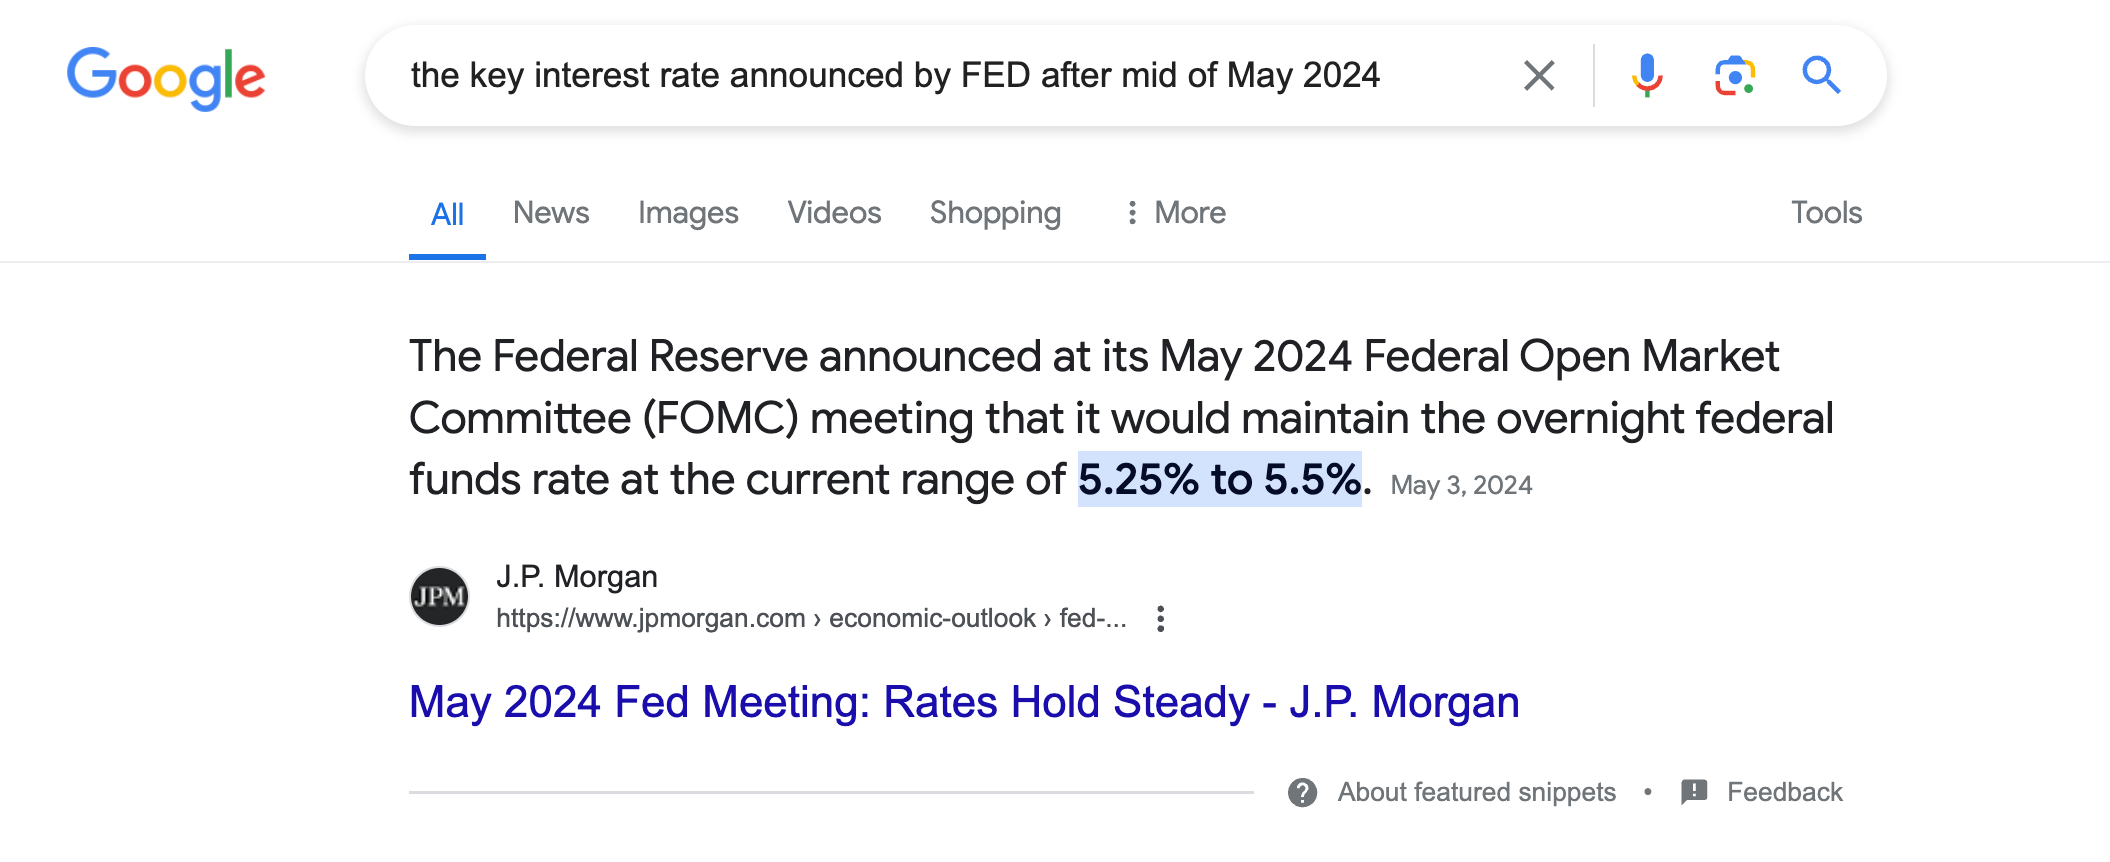

In [13]:
from IPython.display import Image

image_path = "/content/drive/MyDrive/projects/google_gen_ai_sample/contents/images/"
image_file = "grounding_service_google_search.png"
Image(f"{image_path}{image_file}", width=700, height=300)
